In [3]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [16]:
import pandas as pd
train = pd.read_csv('../data/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('../data/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have


Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [17]:
clf = GaussianNB()
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred


array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype='<U15')

In [18]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp 

(6, 1, 1, 2)

In [24]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp

y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
roc_auc = auc(fpr,tpr)

fpr

tpr

thresholds


array([0.96786373, 0.94744331, 0.73518392, 0.14109465, 0.02340433])

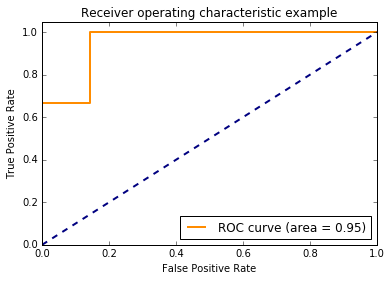

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

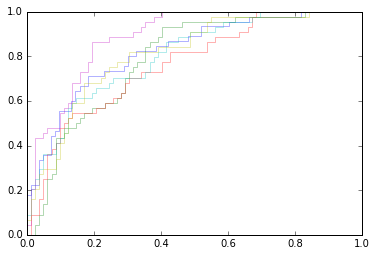

In [45]:
#let's do a cross validation and generate ROC for average values
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
X = train.iloc[:,0:8]
y = train.iloc[:,8]

X = X.as_matrix()
y = y.as_matrix()

i = 0
for tr, ts in cv.split(X, y):
    probas_ = classifier.fit(X[tr],y[tr]).predict_proba(X[ts])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[ts], probas_[:, 1], pos_label='tested_positive')
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
    


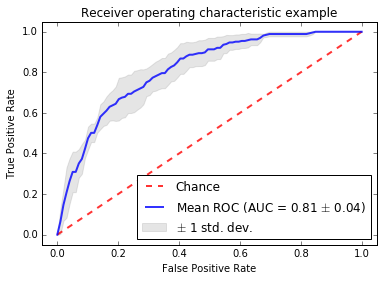

In [46]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
